In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly



%matplotlib inline
df_plot= pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.tail()

,date,Italy,US,Spain,Germany,Taiwan*
108,2020-05-09,218268,1309550,223578,171324,440
109,2020-05-10,219070,1329260,224350,171879,440
110,2020-05-11,219814,1347881,227436,172576,440
111,2020-05-12,221216,1369376,228030,173171,440
112,2020-05-13,222104,1390406,228691,174098,440


In [68]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")

<Figure size 1152x648 with 0 Axes>

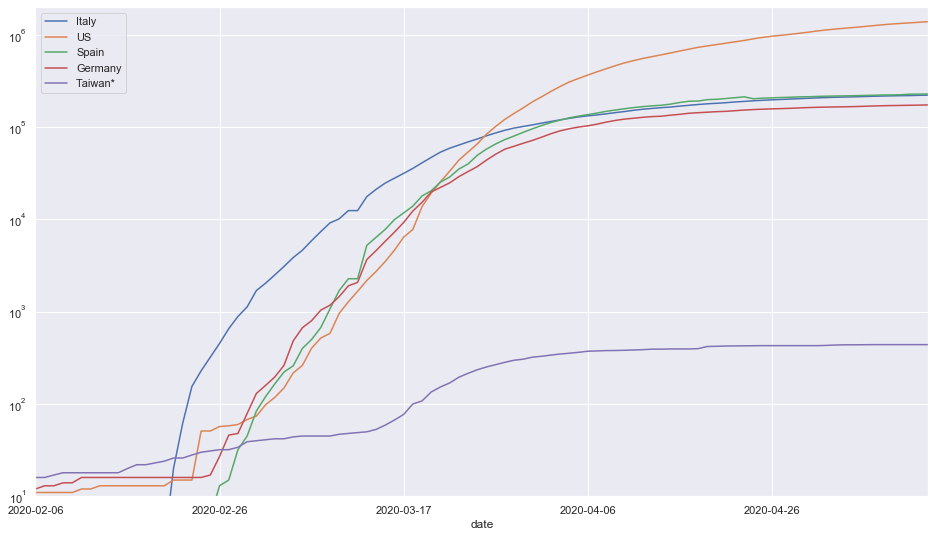

In [69]:
plt.figure();
ax= df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 2000000)
ax.set_yscale('log')

In [70]:
plotly.__version__

'4.7.1'

In [12]:
fig = go.Figure()
countryList = df_plot.columns[1:]
for i in countryList:
    fig.add_trace(go.Scatter(x=df_plot.date,y=df_plot[i],mode='markers+lines',name=i,marker_size = 4,line_width=2))

fig.update_layout(xaxis_title='time',yaxis_title='confirmed infected',width =1000,height=800)
fig.update_yaxes(type='log')
fig.update_xaxes(tickangle=-45)# make tick of x with a angle

fig.update_layout(xaxis_rangeslider_visible=True) # make a adjusting bar!

# fig.show(renderer='chrome')
fig.show()

In [72]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Taiwan*', 'value': 'Taiwan*'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])



In [73]:
from dash.dependencies import Input,Output

#make the options works
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(countryList):
    traces = [] 
    for each in countryList:
        # only accept dict
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log"
                      }
        )
    }


In [ ]:
app.run_server(debug=True,use_reloader=False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 166-315-169
Debugger PIN: 166-315-169
Debugger PIN: 166-315-169
Debugger PIN: 166-315-169
Debugger PIN: 166-315-169
Debugger PIN: 166-315-169
Debugger PIN: 166-315-169
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
